In [1]:
import matplotlib.pyplot as plt
from methods import EulerMethod, RK4Method
import numpy as np
import scipy.integrate as si
%matplotlib inline

Solving a First Order ODE

In [2]:
y0 = 0
t0 = 0
tf= 10
h = 0.1
def yprime(t,y):
    return np.cos(t)

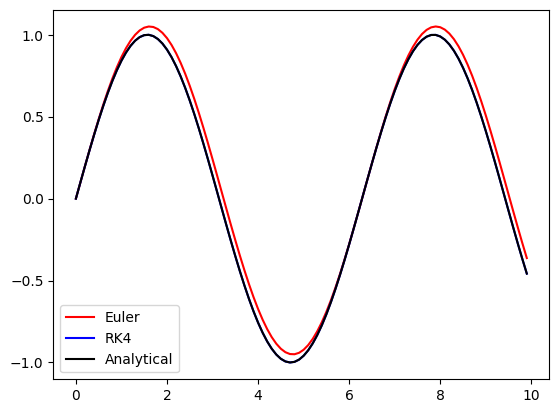

In [3]:
yEM, t = EulerMethod(y0,t0,tf,h,yprime) #using Euler Method
yRK4, t = RK4Method(y0,t0,tf,h,yprime) #using RK4 Method
y = np.sin(t)
#plotting the solution against analytical solution
plt.plot(t, yEM, color='red', label='Euler')
plt.plot(t, yRK4, color='blue', label='RK4')
plt.plot(t, y, color='black', label='Analytical')
plt.legend()

Solving a system of coupled ODE

In [4]:
y0 = np.array([2, 1])
t0 = 0
tf= 3
h = 0.01
def yprime(t,y):
    return np.dot(y,np.array([[-3, 5], [-5, 3]])) # [[a11, a21], [a12, a22]]

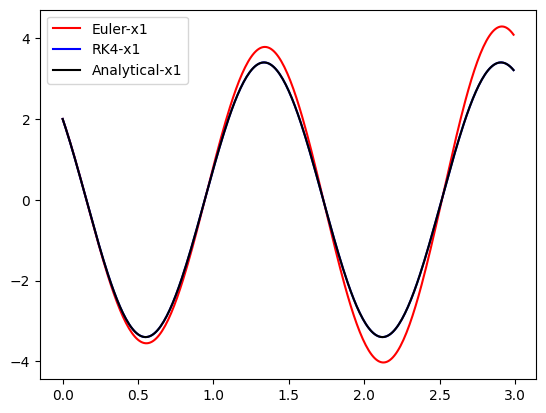

In [5]:
yEM, t = EulerMethod(y0,t0,tf,h,yprime, n=2) #using Euler Method
yRK4, t = RK4Method(y0,t0,tf,h,yprime, n=2) #using RK4 Method
y1 = 2*np.cos(4*t) - 2.75*np.sin(4*t)
y2 = 3.25*np.sin(4*t) + np.cos(4*t)
#plotting the solution against analytical solution 
plt.plot(t, yEM[:,0], color='red', label='Euler-x1')
plt.plot(t, yRK4[:,0], color='blue', label='RK4-x1')
plt.plot(t, y1, color='black', label='Analytical-x1')
plt.legend()

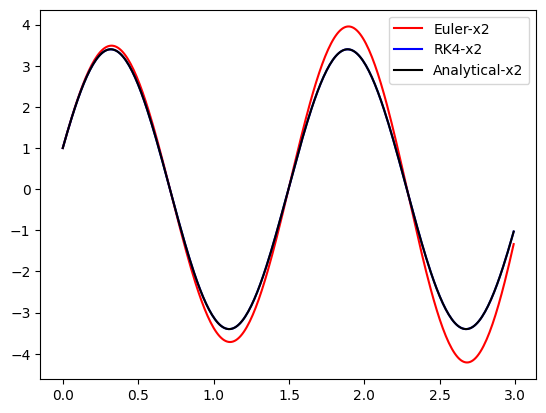

In [6]:
plt.plot(t, yEM[:,1], color='red', label='Euler-x2')
plt.plot(t, yRK4[:,1], color='blue', label='RK4-x2')
plt.plot(t, y2, color='black', label='Analytical-x2')
plt.legend()

Another coupled ODE example

In [7]:
y0 = np.array([2, 5])
t0 = 0
tf= 3
h = 0.01
def yprime(t,y):
    return np.dot(y,np.array([[1, 3], [2, 4]])) # [[a11, a21], [a12, a22]]

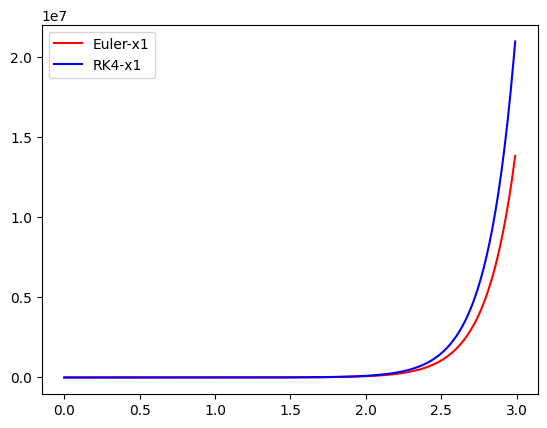

In [8]:
yEM, t = EulerMethod(y0,t0,tf,h,yprime, n=2) #using Euler Method
yRK4, t = RK4Method(y0,t0,tf,h,yprime, n=2) #using RK4 Method
#y1 = 2*np.cos(4*t) - 2.75*np.sin(4*t)
#y2 = 3.25*np.sin(4*t) + np.cos(4*t)
#plotting the solution against analytical solution 
plt.plot(t, yEM[:,0], color='red', label='Euler-x1')
plt.plot(t, yRK4[:,0], color='blue', label='RK4-x1')
#plt.plot(t, y1, color='black', label='Analytical-x1')
plt.legend()

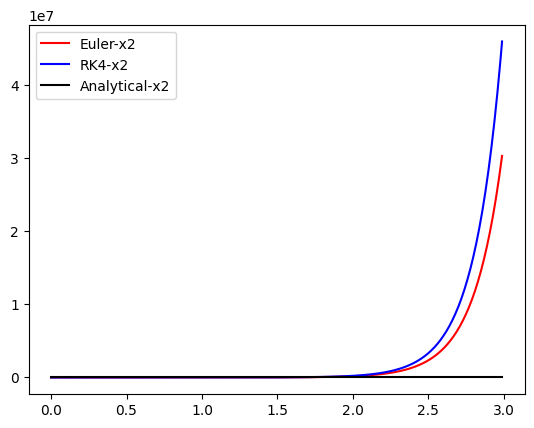

In [9]:
plt.plot(t, yEM[:,1], color='red', label='Euler-x2')
plt.plot(t, yRK4[:,1], color='blue', label='RK4-x2')
plt.plot(t, y2, color='black', label='Analytical-x2')
plt.legend()

Simple Pendulum

In [39]:
pi = 3.14159265359
y0 = np.array([pi/6,0]) # stable position theta = 0
t0 = 0
tf= 20
h = 0.0001
m, l, g, = 1, 10, 9.8
def yprime(t,y):
    return np.array([y[1], -g/l*np.sin(y[0])]) # [[a11, a21], [a12, a22]]

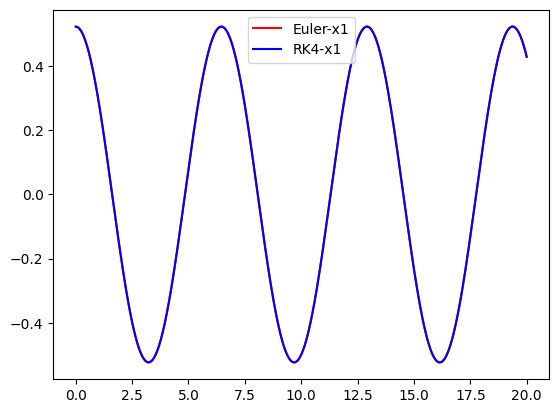

In [40]:
yEM, t = EulerMethod(y0,t0,tf,h,yprime, n=2) #using Euler Method
yRK4, t = RK4Method(y0,t0,tf,h,yprime, n=2) #using RK4 Method
#y1 = 2*np.cos(4*t) - 2.75*np.sin(4*t)
#y2 = 3.25*np.sin(4*t) + np.cos(4*t)
#plotting the solution against analytical solution 
plt.plot(t, yEM[:,0], color='red', label='Euler-x1')
plt.plot(t, yRK4[:,0], color='blue', label='RK4-x1')
#plt.plot(t, y1, color='black', label='Analytical-x1')
plt.legend()

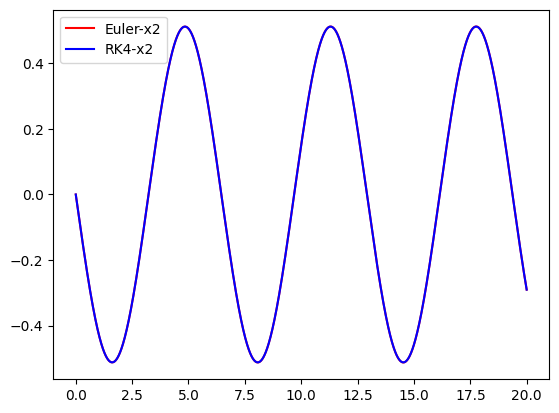

In [41]:
plt.plot(t, yEM[:,1], color='red', label='Euler-x2')
plt.plot(t, yRK4[:,1], color='blue', label='RK4-x2')
#plt.plot(t, y2, color='black', label='Analytical-x2')
plt.legend()

In [42]:
#Error in position 
print("Error in the max and min value of theta: ",np.max(yRK4[:,0]) - np.min(yRK4[:,0]))
E = m*l*l*np.square(yRK4[:,0]) + m*g*l*(np.ones_like(yRK4[:,0]) - np.cos(yRK4[:,0]))
print("Error in the max and min value of total energy: ", np.max(E) - np.min(E))

Error in the max and min value of theta:  1.047197551194067
Error in the max and min value of total energy:  40.54507820983014


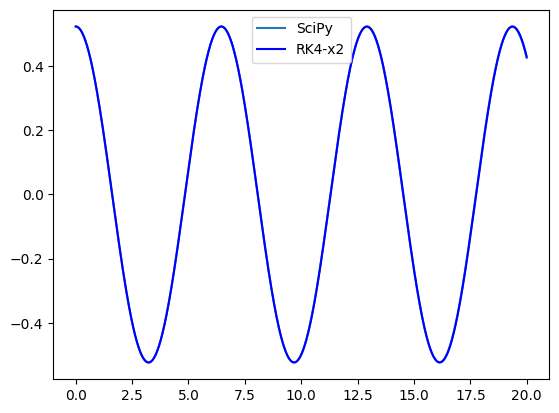

In [43]:
#solving using scipy
y_sci = si.solve_ivp(yprime, [t0,tf], y0, t_eval = np.ravel(t))
plt.plot(y_sci.t, y_sci.y[0], label='SciPy')
plt.plot(t, yRK4[:,0], color='blue', label='RK4-x2')
plt.legend()

In [28]:
print("Error between the solution of SciPy and MyMethod:", np.max(np.abs(y_sci.y[0]-yRK4[:,0])))

Error between the solution of SciPy and MyMethod: 0.004768710017622704
